In [1]:
! pip install qiskit 
! pip install qiskit_aer


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from qiskit import QuantumCircuit , QuantumRegister , ClassicalRegister,transpile
from qiskit.quantum_info import Statevector , partial_trace
from qiskit.visualization import plot_bloch_vector , plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit_aer.library import SaveStatevector
import numpy as np

In [3]:
q = QuantumRegister(3,"q")
c = ClassicalRegister(2,"c")
qc = QuantumCircuit(q ,c)

In [4]:
qc.x(q[0])
qc.barrier()
qc.h(q[1])
qc.cx(q[1],q[2])
qc.cx(q[0],q[1])
qc.h(q[0])
qc.barrier()
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.barrier()
with qc.if_test((c[1],1)):
    qc.x(q[2])
    
with qc.if_test((c[0],1)):
    qc.z(q[2])

In [5]:
qc.draw("text")

┌───┐ ░                ┌───┐ ░ ┌─┐    ░                           »
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────────────────────────»
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                           »
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───────────────────────────»
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░   ┌──────  ┌───┐ ───────┐ »
q_2: ──────░──────┤ X ├───────────░──╫──╫──░───┤ If-0  ─┤ X ├  End-0 ├─»
           ░      └───┘           ░  ║  ║  ░   └──╥───  └───┘ ───────┘ »
                                     ║  ║    ┌────╨────┐               »
c: 2/════════════════════════════════╩══╩════╡ c_1=0x1 ╞═══════════════»
                                     0  1    └─────────┘               »
«                               
«q_0: ──────────────────────────
«                               
«q_1: ──────────────────────────
«       ┌──────  ┌───┐ ───────┐ 
«q_2: ──┤ If-0  ─┤ Z ├  End-0 ├─
«       └──╥───  └───┘ ───────┘ 
«     ┌────╨────┐               
«c: 2/╡ c_0=0x1 ╞═══════════════
«     └─────────┘

In [6]:
sim = AerSimulator()
compiled = transpile(qc,sim)
result = sim.run(compiled, shots = 1024).result()
counts = result.get_counts()

In [7]:
qc_sv = qc.remove_final_measurements(inplace=False)

qc_sv.append(SaveStatevector(qc_sv.num_qubits), qc_sv.qubits)

sim_sv = AerSimulator(method="statevector")
compiled_sv = transpile(qc_sv, sim_sv)

result_sv = sim_sv.run(compiled_sv).result()
state = result_sv.data(0)["statevector"]
rho_q2 = partial_trace(state, [0, 1]) 

Density matrix data:
[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Type: <class 'numpy.ndarray'>
Shape: (2, 2)

Components:
x = 0.0 (type: <class 'numpy.float64'>)
y = 0.0 (type: <class 'numpy.float64'>)
z = -1.0 (type: <class 'numpy.float64'>)

Final Bloch vector: [0.0, 0.0, -1.0]


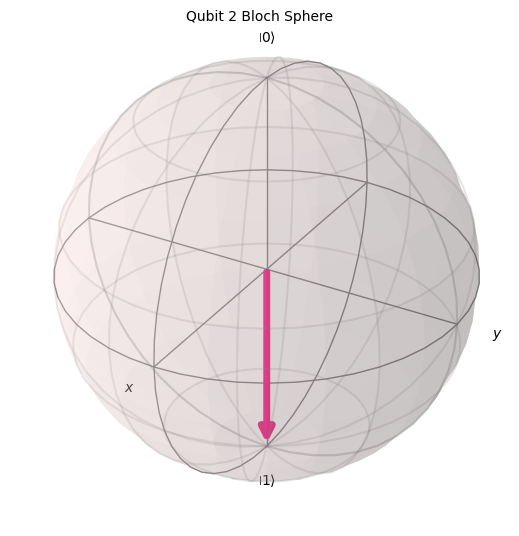

In [8]:
rho_data = rho_q2.data

print("Density matrix data:")
print(rho_data)
print(f"Type: {type(rho_data)}")
print(f"Shape: {rho_data.shape}")
x_component = 2 * np.real(rho_data[0, 1])
y_component = 2 * np.imag(rho_data[0, 1])  
z_component = np.real(rho_data[0, 0] - rho_data[1, 1])

print(f"\nComponents:")
print(f"x = {x_component} (type: {type(x_component)})")
print(f"y = {y_component} (type: {type(y_component)})")
print(f"z = {z_component} (type: {type(z_component)})")

bloch_vector = [
    float(x_component),
    float(y_component),
    float(z_component)
]

print(f"\nFinal Bloch vector: {bloch_vector}")

plot_bloch_vector(bloch_vector, title="Qubit 2 Bloch Sphere")

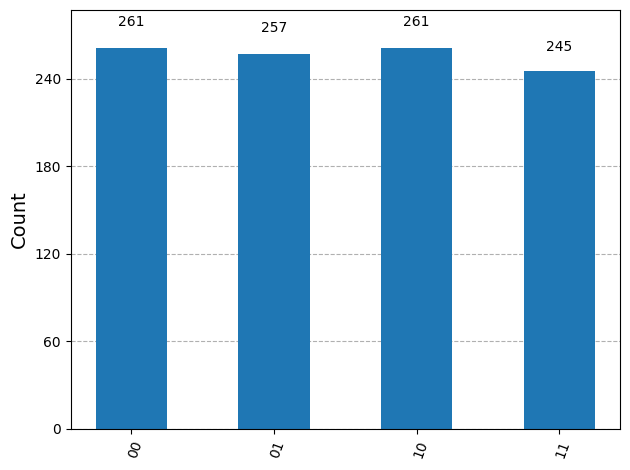

In [9]:
plot_histogram(counts)